In [7]:
# Imports
import pandas as pd
import numpy as np
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from zipline.pipeline.data import USEquityPricing
from quantopian.pipeline.filters import Q1500US

from quantopian.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns
from quantopian.pipeline.data import morningstar as mstar

trading_calendar = get_calendar('NYSE')

In [8]:
# Equities for which morningstar's most recent Market Cap value is above $20b.
have_market_cap = (mstar.valuation.market_cap.latest > 20000000000)


In [9]:
# create an empty pipeline with have_market_cap screen
pipeline = Pipeline(screen = have_market_cap)

In [10]:
# create daily returns factor
daily_ret = DailyReturns(inputs = [USEquityPricing.close])

### Add factors and filters to the pipeline
in the code below we add the daily_ret to the pipeline created above

In [11]:
# add the daily returns factor to the pipeline
pipeline.add(daily_ret, 'daily_return')

In [13]:
# set starting and end dates
start_date = pd.Timestamp('2014-01-01', tz = 'utc')
end_date = pd.Timestamp('2019-07-26', tz = 'utc')

# Run our pipeline for the given start and end dates
output = run_pipeline(pipeline, start_date, end_date)

# Dispaly the pipeline outpute
output.head(50)

daily_return
2014-01-02 00:00:00+00:00 Equity(24 [AAPL])          0.012011
                          Equity(62 [ABT])          -0.001562
                          Equity(64 [GOLD])          0.029206
                          Equity(114 [ADBE])         0.005542
                          Equity(128 [ADM])         -0.006409
                          Equity(157 [AEG])          0.006369
                          Equity(161 [AEP])          0.002144
                          Equity(168 [AET])          0.006457
                          Equity(185 [AFL])          0.001574
                          Equity(205 [AGN])          0.003342
                          Equity(216 [HES])          0.004611
                          Equity(239 [AIG])         -0.001174
                          Equity(337 [AMAT])         0.010860
                          Equity(357 [TWX])          0.000718
                          Equity(368 [AMGN])        -0.011864
                          Equity(438 [AON])          0.007809
                          Equity(448 [APA])         -0.002553
                          Equity(455 [APC])          0.002781
                          Equity(460 [APD])         -0.007105
                          Equity(630 [ADP])         -0.003453
                          Equity(679 [AXP])          0.012725
                          Equity(698 [BA])           0.004194
                          Equity(700 [BAC])          0.001931
                          Equity(734 [BAX])          0.004043
                          Equity(753 [BBVA])         0.002429
                          Equity(766 [BCE])         -0.000577
                          Equity(780 [BCS])          0.008904
                          Equity(794 [BDX])         -0.000814
                          Equity(812 [BEN])          0.009266
                          Equity(858 [BHI])          0.015060
                          Equity(863 [BHP])          0.006347
                          Equity(903 [BK])           0.011581
                          Equity(980 [BMY])          0.001696
                          Equity(1010 [BNS])         0.005145
                          Equity(1091 [BRK_A])       0.005096
                          Equity(1161 [BT])          0.011058
                          Equity(1251 [CAJ])         0.004710
                          Equity(1267 [CAT])        -0.000440
                          Equity(1274 [CB])          0.005201
                          Equity(1335 [C])           0.003467
                          Equity(1376 [CAH])        -0.004173
                          Equity(1406 [CELG])       -0.000474
                          Equity(1539 [CI])          0.010162
                          Equity(1582 [CL])         -0.003363
                          Equity(1637 [CMCS_A])      0.001735
                          Equity(1638 [CMCS_K])      0.002613
                          Equity(1787 [COST])        0.002105
                          Equity(1792 [CP])          0.005051
                          Equity(1856 [CRH])         0.013085
                          Equity(1900 [CSCO])        0.008090

In [14]:
output.shape

(564122, 1)

Turn output into a dateime indexed dataframe

In [18]:
returns_df = output.daily_return.unstack().fillna(0)
returns_df

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
2014-01-02 00:00:00+00:00,0.0,0.012011,0.0,-0.001562,0.029206,0.000000,0.0,0.005542,0.000000,-0.006409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-03 00:00:00+00:00,0.0,-0.014131,0.0,-0.002608,0.039160,0.000000,0.0,-0.009855,0.000000,-0.009445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-06 00:00:00+00:00,0.0,-0.022034,0.0,0.010199,-0.009285,0.000000,0.0,-0.002024,0.000000,0.004186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-07 00:00:00+00:00,0.0,0.005377,0.0,0.013461,0.012128,0.000000,0.0,-0.017918,0.000000,0.002547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-08 00:00:00+00:00,0.0,-0.007205,0.0,-0.007663,-0.004357,0.000000,0.0,0.014802,0.000000,-0.010164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-09 00:00:00+00:00,0.0,0.006407,0.0,0.009009,-0.018600,0.000000,0.0,-0.001187,0.000000,-0.011435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-10 00:00:00+00:00,0.0,-0.012861,0.0,0.001786,-0.011706,0.000000,0.0,0.003566,0.000000,-0.004485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-13 00:00:00+00:00,0.0,-0.006673,0.0,0.007894,0.025381,0.000000,0.0,0.007445,0.000000,-0.004624,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-14 00:00:00+00:00,0.0,0.005048,0.0,-0.006352,0.000000,0.000000,0.0,-0.015536,0.000000,-0.010602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2014-01-15 00:00:00+00:00,0.0,0.020127,0.0,0.011762,-0.020902,0.000000,0.0,0.029771,0.000000,0.019263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [19]:
returns_df.shape

(1401, 673)

In [20]:
ann_factor = 252
cov_assets = ann_factor*np.cov(returns_df.T)
cov_assets

array([[  1.06067591e-03,   2.89465492e-04,  -3.30328247e-07, ...,
         -1.10268307e-05,  -2.00745309e-06,  -4.35250047e-06],
       [  2.89465492e-04,   5.95955747e-02,   5.92794605e-06, ...,
          2.43794067e-03,   3.39944688e-04,   1.35346922e-03],
       [ -3.30328247e-07,   5.92794605e-06,   4.41661555e-05, ...,
         -1.05309259e-06,  -1.91717279e-07,  -4.15675738e-07],
       ..., 
       [ -1.10268307e-05,   2.43794067e-03,  -1.05309259e-06, ...,
          2.22413849e-02,   7.88037290e-04,   7.29502584e-04],
       [ -2.00745309e-06,   3.39944688e-04,  -1.91717279e-07, ...,
          7.88037290e-04,   4.43911774e-03,   8.25116849e-04],
       [ -4.35250047e-06,   1.35346922e-03,  -4.15675738e-07, ...,
          7.29502584e-04,   8.25116849e-04,   5.22706932e-03]])

In [21]:
cov_assets.shape

(673, 673)

## L23-6 Factor Model of Asset Return Exercise starts here

#### Lets look at one stock
let's look at this for just one stock

In [23]:
aapl_col = returns_df.columns[1]
asset_return = returns_df[aapl_col]
asset_return = asset_return.rename('asset return')

In [25]:
asset_return

2014-01-02 00:00:00+00:00    0.012011
2014-01-03 00:00:00+00:00   -0.014131
2014-01-06 00:00:00+00:00   -0.022034
2014-01-07 00:00:00+00:00    0.005377
2014-01-08 00:00:00+00:00   -0.007205
2014-01-09 00:00:00+00:00    0.006407
2014-01-10 00:00:00+00:00   -0.012861
2014-01-13 00:00:00+00:00   -0.006673
2014-01-14 00:00:00+00:00    0.005048
2014-01-15 00:00:00+00:00    0.020127
2014-01-16 00:00:00+00:00    0.020077
2014-01-17 00:00:00+00:00   -0.005616
2014-01-21 00:00:00+00:00   -0.024935
2014-01-22 00:00:00+00:00    0.015895
2014-01-23 00:00:00+00:00    0.004572
2014-01-24 00:00:00+00:00    0.008468
2014-01-27 00:00:00+00:00   -0.017944
2014-01-28 00:00:00+00:00    0.007964
2014-01-29 00:00:00+00:00   -0.079411
2014-01-30 00:00:00+00:00   -0.012410
2014-01-31 00:00:00+00:00   -0.002757
2014-02-03 00:00:00+00:00    0.002865
2014-02-04 00:00:00+00:00    0.002078
2014-02-05 00:00:00+00:00    0.014273
2014-02-06 00:00:00+00:00    0.007508
2014-02-07 00:00:00+00:00    0.005672
2014-02-10 0

#### Factor Returns
let's make up a "factor" by taking an average of all stocks in our list. You can think of this as an equal weighted index of the X number of stocks, kind of like a measure of the "market". We'll also make another facotr by calculating the median of all stocks. These are mainly intended to help us generate some data to work with. We'll go into how some common risk facotrs are generated later in the lessons.

Also note that we're setting axis = 1 so that we calculate a value for each time period (row) instead of one value for each column (assets).

In [38]:
factor_return_1 = returns_df.mean(axis = 1)
factor_return_2 = returns_df.median(axis=1)

#### Factor exposures
factor exposures refer to how "exposed" a stock is to each factor. We'll get into this more later. For now, just think of this as one number foreach stock, each of the factors.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
"""
You can run these in separate cells to see each step in detail.
But for now, just assum that we're calculateing a number for each
stock, for each factor, which represents how "exposed" each stock is to each factor.
We'll discuss how factor exposure is calculated in later lessons.
"""
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
X = np.array([factor_return_1.values, factor_return_2.values]).T
X

array([[ 0.00270292,  0.        ],
       [-0.00619666,  0.        ],
       [-0.0002496 ,  0.        ],
       ..., 
       [ 0.00441467,  0.        ],
       [ 0.0029885 ,  0.        ],
       [-0.00384101,  0.        ]])

In [42]:
X.shape

(1401, 2)

In [43]:
factor_return_1.values

array([ 0.00270292, -0.00619666, -0.0002496 , ...,  0.00441467,
        0.0029885 , -0.00384101])

In [44]:
y = np.array(asset_return.values)
y

array([ 0.01201082, -0.01413144, -0.02203424, ...,  0.00774539,
       -0.00074225, -0.00776345])

In [45]:
y.shape

(1401,)

In [46]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
factor_exposure_1 = lr.coef_[0]
factor_exposure_1

1.7556909551868816

In [48]:
factor_exposure_2 = lr.coef_[1]
factor_exposure_2

0.35145681358345698

#### Quiz 1 - Contribution of Factors
The sum of the products of factor exposure times factor return is the contribution of the factors. It's also called the "common return". 

Calculate the common return of AAPL, given the two factor expsoures and the tow factor returns

#### Answer 1
Calculate the contribution of the two factors to the return of this example asset

In [49]:
common_return = (factor_exposure_1 * factor_return_1) + (factor_exposure_2 * factor_return_2)
common_return = common_return.rename('common_return')
common_return

2014-01-02 00:00:00+00:00    0.004745
2014-01-03 00:00:00+00:00   -0.010879
2014-01-06 00:00:00+00:00   -0.000438
2014-01-07 00:00:00+00:00   -0.003243
2014-01-08 00:00:00+00:00    0.004709
2014-01-09 00:00:00+00:00    0.000008
2014-01-10 00:00:00+00:00   -0.000032
2014-01-13 00:00:00+00:00    0.005086
2014-01-14 00:00:00+00:00   -0.010585
2014-01-15 00:00:00+00:00    0.009105
2014-01-16 00:00:00+00:00    0.002708
2014-01-17 00:00:00+00:00   -0.001110
2014-01-21 00:00:00+00:00   -0.003216
2014-01-22 00:00:00+00:00    0.002291
2014-01-23 00:00:00+00:00    0.001954
2014-01-24 00:00:00+00:00   -0.009381
2014-01-27 00:00:00+00:00   -0.022778
2014-01-28 00:00:00+00:00   -0.005462
2014-01-29 00:00:00+00:00    0.008172
2014-01-30 00:00:00+00:00   -0.009867
2014-01-31 00:00:00+00:00    0.010848
2014-02-03 00:00:00+00:00   -0.005860
2014-02-04 00:00:00+00:00   -0.020028
2014-02-05 00:00:00+00:00    0.007311
2014-02-06 00:00:00+00:00   -0.000791
2014-02-07 00:00:00+00:00    0.012156
2014-02-10 0

#### Quiz 2 - Specific Return
The specific return is the part of the stock return that isn't explained by teh factors. So it's teh actual reutrn minus the common return.

Calculate the specific return of the stock.

In [50]:
specific_return = asset_return - common_return
specific_return = specific_return.rename('specific_return')
specific_return

2014-01-02 00:00:00+00:00    0.007265
2014-01-03 00:00:00+00:00   -0.003252
2014-01-06 00:00:00+00:00   -0.021596
2014-01-07 00:00:00+00:00    0.008620
2014-01-08 00:00:00+00:00   -0.011914
2014-01-09 00:00:00+00:00    0.006399
2014-01-10 00:00:00+00:00   -0.012829
2014-01-13 00:00:00+00:00   -0.011758
2014-01-14 00:00:00+00:00    0.015633
2014-01-15 00:00:00+00:00    0.011021
2014-01-16 00:00:00+00:00    0.017369
2014-01-17 00:00:00+00:00   -0.004506
2014-01-21 00:00:00+00:00   -0.021720
2014-01-22 00:00:00+00:00    0.013604
2014-01-23 00:00:00+00:00    0.002617
2014-01-24 00:00:00+00:00    0.017849
2014-01-27 00:00:00+00:00    0.004834
2014-01-28 00:00:00+00:00    0.013426
2014-01-29 00:00:00+00:00   -0.087583
2014-01-30 00:00:00+00:00   -0.002543
2014-01-31 00:00:00+00:00   -0.013605
2014-02-03 00:00:00+00:00    0.008725
2014-02-04 00:00:00+00:00    0.022105
2014-02-05 00:00:00+00:00    0.006963
2014-02-06 00:00:00+00:00    0.008299
2014-02-07 00:00:00+00:00   -0.006485
2014-02-10 0

#### Visualize the common return and the specific return

In [51]:
return_components = pd.concat([common_return, specific_return], axis=1)
return_components.head(3)

,common_return,specific_return
2014-01-02 00:00:00+00:00,0.004745,0.007265
2014-01-03 00:00:00+00:00,-0.010879,-0.003252
2014-01-06 00:00:00+00:00,-0.000438,-0.021596


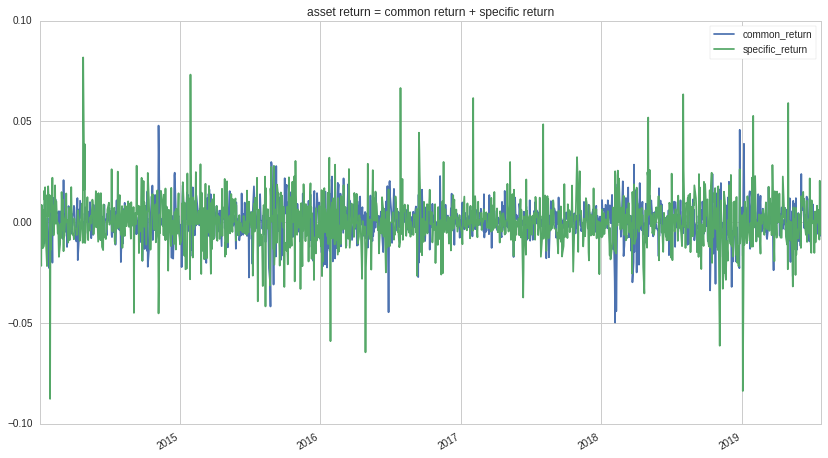

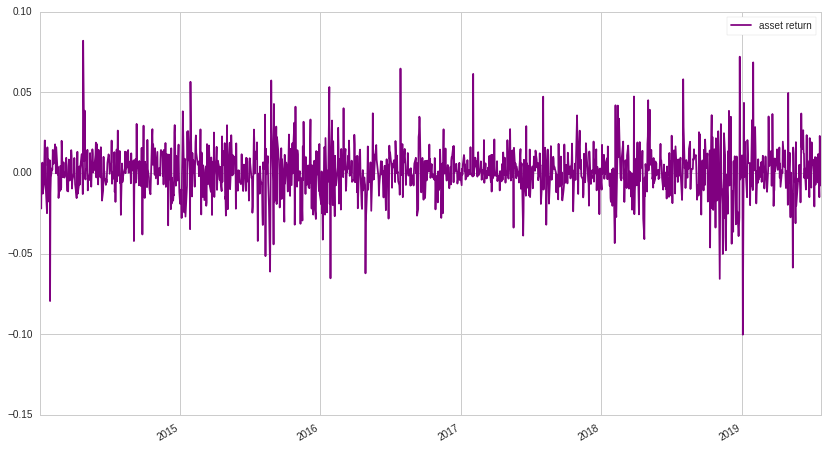

In [52]:
return_components.plot(title="asset return = common return + specific return");
pd.DataFrame(asset_return).plot(color='purple');